# Standardized Tests Performance in California Schools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns = 30

## Data Gathering

Dataset: 2019 ACT Scores in California by School

Source: California Department of Education https://www.cde.ca.gov/ds/sp/ai/

Description: The information in this dataset contains the results for 12th graders across all school districts in CA. 
The scores included are for Reading, Math, English and Science. The number of enrolled students in the high school 
and the number of test takers is also documented. 

In [2]:
act_file = 'act_2019_ca.csv'
file_path = '../data/'

### ACT Dataset

In [3]:
act = pd.read_csv(file_path + act_file)
act.head() # Check the first five rows of the dataset

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,Unnamed: 17
0,3.366993e+13,33.0,3366993.0,129882.0,S,21st Century Learning Institute,Beaumont Unified,Riverside,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,1.964212e+13,19.0,1964212.0,1995596.0,S,ABC Secondary (Alternative),ABC Unified,Los Angeles,58.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
2,1.563776e+13,15.0,1563776.0,1530377.0,S,Abraham Lincoln Alternative,Southern Kern Unified,Kern,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
3,4.369666e+13,43.0,4369666.0,4333795.0,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,23,22,22,23,34,64.15,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1935121.0,S,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,21,20,23,22,11,57.89,2018-19,NaN


In [4]:
act.tail() # Check the last five rows of the dataset

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,Unnamed: 17
2305,5.810588e+13,58.0,5810587.0,5830112.0,S,Yuba County Career Preparatory Charter,Yuba County Office of Education,Yuba,102.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
2306,3.667959e+13,36.0,3667959.0,3638509.0,S,Yucaipa High,Yucaipa-Calimesa Joint Unified,San Bernardino,628.0,61.0,24,22,22,22,40,65.57,2018-19,NaN
2307,3.667777e+13,36.0,3667777.0,3638616.0,S,Yucca Valley High,Morongo Unified,San Bernardino,314.0,11.0,*,*,*,*,*,*,2018-19,NaN
2308,3.667850e+13,36.0,3667850.0,3630530.0,S,Zupanic High,Rialto Unified,San Bernardino,47.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
2309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Remove columns "Unnamed: 17" and the last row of the dataset since they do not have any information

In [5]:
act.drop(columns = 'Unnamed: 17', inplace = True)
act.drop([2309], inplace = True)

Check ACT dataset size:

In [6]:
print(f'ACT dataset has {act.shape[1]} columns and {act.shape[0]-1} rows of data.')

ACT dataset has 17 columns and 2308 rows of data.


## Data Cleaning

Statistical summary of dataset:

In [7]:
act.describe(include='all')

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year
count,2.309000e+03,2309.000000,2.309000e+03,1.787000e+03,2309,1729,2251,2309,2309.000000,2309.000000,1953,1953,1953,1953,1953,1953,2309
unique,NaN,NaN,NaN,NaN,4,1647,525,59,NaN,NaN,22,24,20,21,279,915,1
top,NaN,NaN,NaN,NaN,S,John F. Kennedy High,Los Angeles Unified,Los Angeles,NaN,NaN,*,*,*,*,*,*,2018-19
freq,NaN,NaN,NaN,NaN,1728,6,200,466,NaN,NaN,532,532,532,532,532,532,2309
mean,2.929718e+13,28.666522,2.855616e+06,1.902681e+06,NaN,NaN,NaN,NaN,828.172802,143.182763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.444996e+13,14.425498,1.492574e+06,1.838954e+06,NaN,NaN,NaN,NaN,10667.048988,1816.545548,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.964725e+13,19.000000,1.964519e+06,1.254385e+05,NaN,NaN,NaN,NaN,78.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.066647e+13,30.000000,3.066548e+06,1.930288e+06,NaN,NaN,NaN,NaN,218.000000,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.868478e+13,38.000000,3.777032e+06,3.435674e+06,NaN,NaN,NaN,NaN,497.000000,86.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check for null values:

In [8]:
act.isnull().sum()

CDS             0
CCode           0
CDCode          0
SCode         522
RType           0
SName         580
DName          58
CName           0
Enroll12        0
NumTstTakr      0
AvgScrRead    356
AvgScrEng     356
AvgScrMath    356
AvgScrSci     356
NumGE21       356
PctGE21       356
Year            0
dtype: int64

In [9]:
act[act['NumTstTakr'] == 0].shape

(356, 17)

The missing values in column "SName" are expected because this field belongs to record type "S" for School, and there are 580 records for District and County which will not have an SName. In a similar way, the missing values in column "DName" are expected too because this field belongs to record type "D" for District, and there are 58 records for County which will not have a DName. Below is the breakdown of the record types in the dataset which coincide with the missing values seeing above.

In [10]:
act['RType'].value_counts()

S    1728
D     522
C      58
X       1
Name: RType, dtype: int64

Check the data type for each variable to make sure they are correct:

In [11]:
act.dtypes

CDS           float64
CCode         float64
CDCode        float64
SCode         float64
RType          object
SName          object
DName          object
CName          object
Enroll12      float64
NumTstTakr    float64
AvgScrRead     object
AvgScrEng      object
AvgScrMath     object
AvgScrSci      object
NumGE21        object
PctGE21        object
Year           object
dtype: object

Upon review of the column data types, the columns with codes should be strings and not numerical. A function will be created to convert the data type of these columns

In [12]:
# Convert the data type of a value from numeric to string 
def to_string(cell):
    return str(cell)

In [13]:
act['CDS'] = act['CDS'].map(to_string)
act['CCode'] = act['CCode'].map(to_string)
act['CDCode'] = act['CDCode'].map(to_string)
act['SCode'] = act['SCode'].map(to_string)

For the columns containing a score, replace the asterisk (*) with NaN, so that the columns datatype is numerical

In [14]:
def clean_score(cell):
    if cell == '*':
        return np.nan
    else:
        return float(cell)

In [15]:
act['AvgScrRead'] = act['AvgScrRead'].map(clean_score)
act['AvgScrEng'] = act['AvgScrEng'].map(clean_score)
act['AvgScrMath'] = act['AvgScrMath'].map(clean_score)
act['AvgScrSci'] = act['AvgScrSci'].map(clean_score)
act['NumGE21'] = act['NumGE21'].map(clean_score)
act['PctGE21'] = act['PctGE21'].map(clean_score)

Rename column names to make them self explanatory:

In [16]:
{c: c.lower() for c in act.columns}

new_columns_dict = {'CDS': 'code',
 'CCode': 'county_code',
 'CDCode': 'district_code',
 'SCode': 'school_code',
 'RType': 'record_type',
 'SName': 'school_name',
 'DName': 'district_name',
 'CName': 'county_name',
 'Enroll12': '12grade_enrollment',
 'NumTstTakr': 'test_takers',
 'AvgScrRead': 'avg_scr_read',
 'AvgScrEng': 'avg_scr_eng',
 'AvgScrMath': 'avg_scr_math',
 'AvgScrSci': 'avg_scr_sci',
 'NumGE21': 'tst_takers_scr>21',
 'PctGE21': 'tst_takers%_scr>21',
 'Year': 'tst_year'}

act.rename(columns=new_columns_dict, inplace = True)

The following data point is for overall information on the state of california. It is not required for the data analysis and therefore, it will be removed.

In [17]:
act[act['county_name']=='State of California']

,code,county_code,district_code,school_code,record_type,school_name,district_name,county_name,12grade_enrollment,test_takers,avg_scr_read,avg_scr_eng,avg_scr_math,avg_scr_sci,tst_takers_scr>21,tst_takers%_scr>21,tst_year
2070,0.0,0.0,0.0,0.0,X,State of California,State of California,State of California,489650.0,82668.0,22.0,22.0,22.0,22.0,45466.0,55.0,2018-19


In [18]:
act.drop([2070], inplace = True)

## Exploratory Data Analysis

### Create new features
Add a column for the area where the school is located: urban, rural, or suburban area

In [19]:
counties = act['county_name'].nunique()
print(f'There are {counties} counties in this dataset')
districts = act['district_name'].nunique()
print(f'There are {districts} school districts in this dataset')
schools = act['school_name'].nunique()
print(f'There are {schools} schools in this dataset')

There are 58 counties in this dataset
There are 524 school districts in this dataset
There are 1646 schools in this dataset


Explore the number of students who signed up to take the ACT in each county:

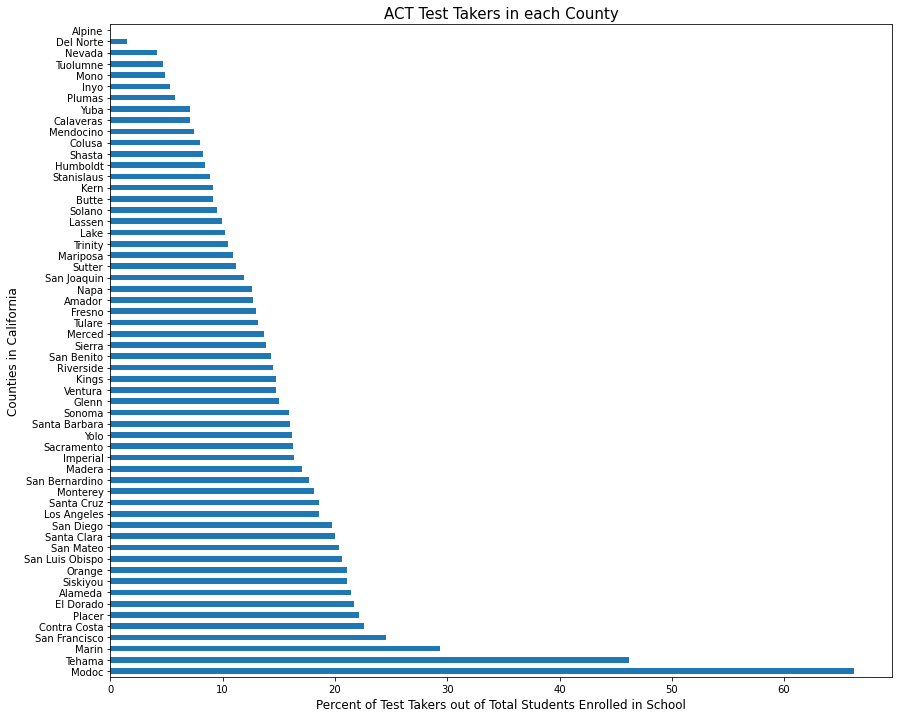

In [20]:
test_takers_county = act.groupby('county_name')['test_takers'].sum()
pct_test_takers_county = test_takers_county/act.groupby('county_name')['12grade_enrollment'].sum()*100
pct_test_takers_county = pct_test_takers_county.sort_values(ascending=False)

plt.figure(figsize=(14,12))
pct_test_takers_county.plot.barh()
plt.title('ACT Test Takers in each County', size=15)
plt.xlabel('Percent of Test Takers out of Total Students Enrolled in School', size=12)
plt.ylabel('Counties in California', size=12);

Explore the number of students in each county who met the bechmark score (>21)

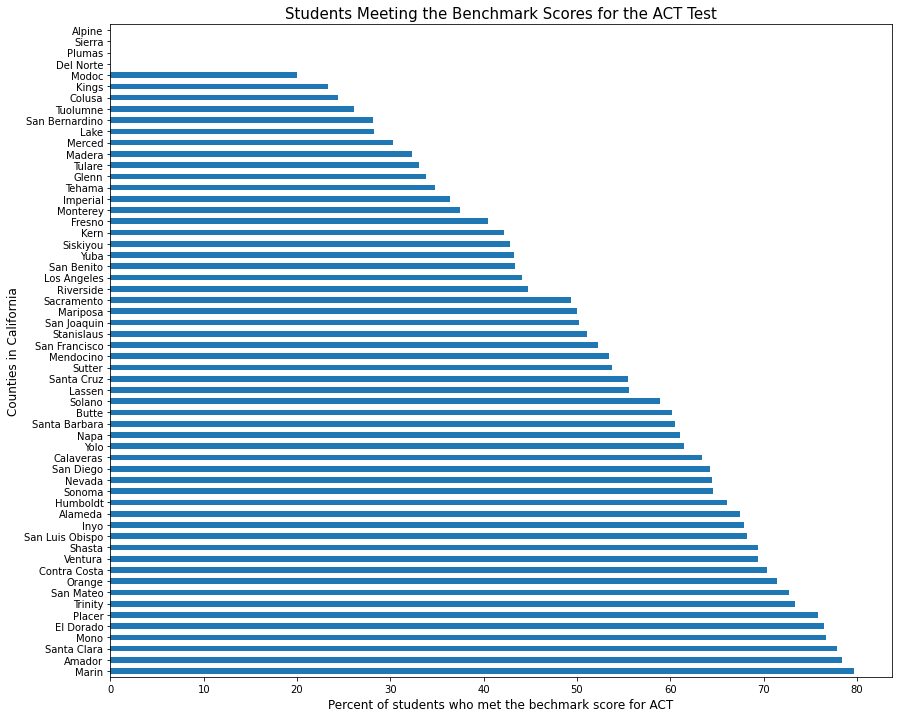

In [21]:
students_passing_by_county = act.groupby('county_name')['tst_takers_scr>21'].sum()
pct_passing_county = students_passing_by_county/act.groupby('county_name')['test_takers'].sum()*100
pct_passing_county = pct_passing_county.sort_values(ascending=False)

plt.figure(figsize=(14,12))
pct_passing_county.plot.barh()
plt.title('Students Meeting the Benchmark Scores for the ACT Test', size=15)
plt.xlabel('Percent of students who met the bechmark score for ACT', size=12)
plt.ylabel('Counties in California', size=12);

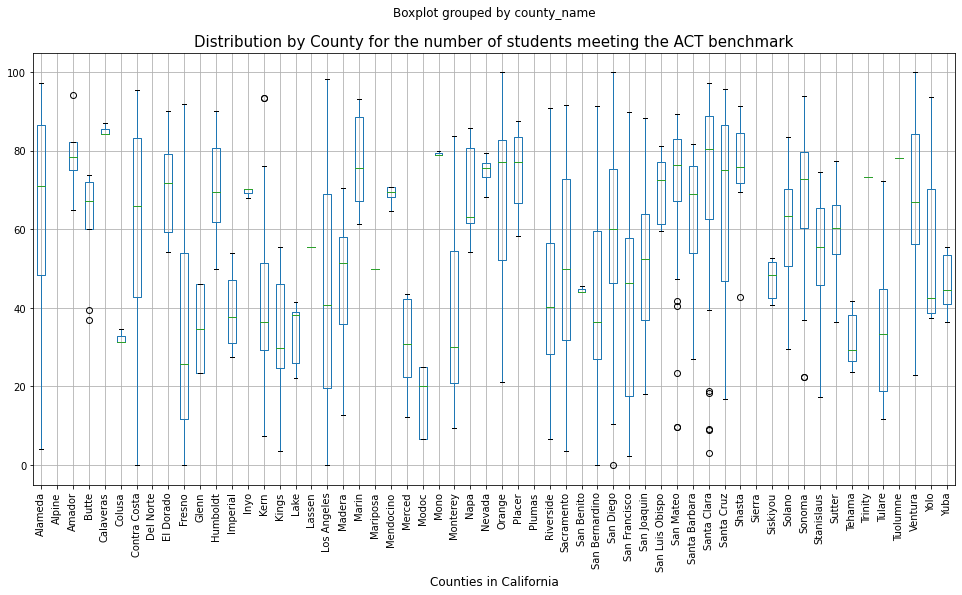

In [22]:
act.boxplot(column=['tst_takers%_scr>21'], by=['county_name'], figsize=(16,8))
plt.title('Distribution by County for the number of students meeting the ACT benchmark', size=15)
plt.xticks(rotation=90)
plt.xlabel('Counties in California', size=12);

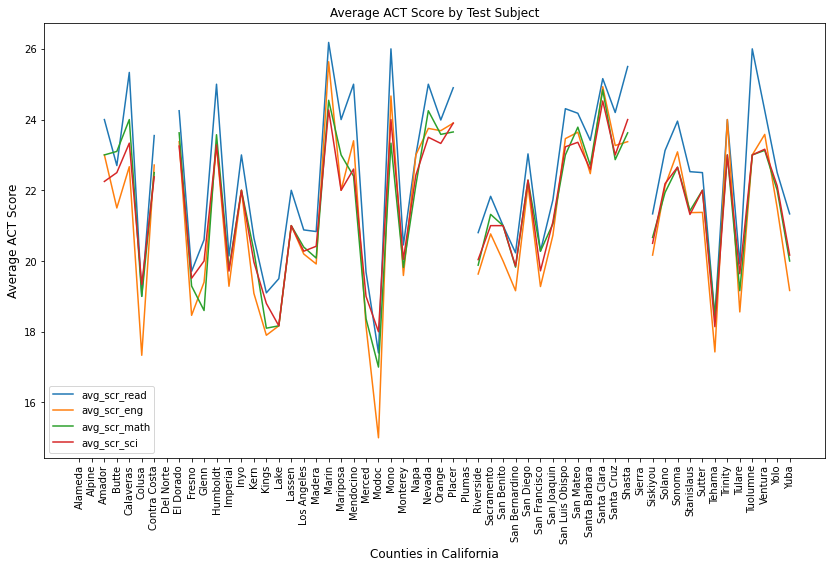

In [23]:
act_by_county = act.groupby('county_name')[['avg_scr_read', 'avg_scr_eng', 'avg_scr_math', 'avg_scr_sci']].mean()

# Set up ticks and their labels for the graph
ticks=list(np.arange(0, len(act_by_county.index), 1))
labels=list(act_by_county.index)

act_by_county.plot(figsize=(14,8));
plt.title('Average ACT Score by Test Subject')
plt.xlabel('Counties in California', size=12)
plt.xticks(ticks=ticks, labels=labels, rotation=90)
plt.ylabel('Average ACT Score', size=12);

Explore ACT vs SAT enrollment

In [24]:
sat_file = 'sat_2019_ca.csv'
sat = pd.read_csv(file_path + sat_file)

In [25]:
sat['all_test_takers'] = sat['NumTSTTakr12'] + sat['NumTSTTakr11']
sat_test_takers_county = sat[sat['CName']!='State of California'].groupby('CName')['all_test_takers'].sum()
sat_test_takers_county = pd.DataFrame(data=sat_test_takers_county.values, 
                                      index=sat_test_takers_county.index, 
                                      columns=['sat_enrollment'])
act_test_takers_county = act.groupby('county_name')[['test_takers']].sum()
act_test_takers_county = pd.DataFrame(data=act_test_takers_county.values, 
                                      index=act_test_takers_county.index, 
                                      columns=['act_enrollment'])

In [26]:
college_tests_county = pd.concat([sat_test_takers_county, act_test_takers_county], axis=1)

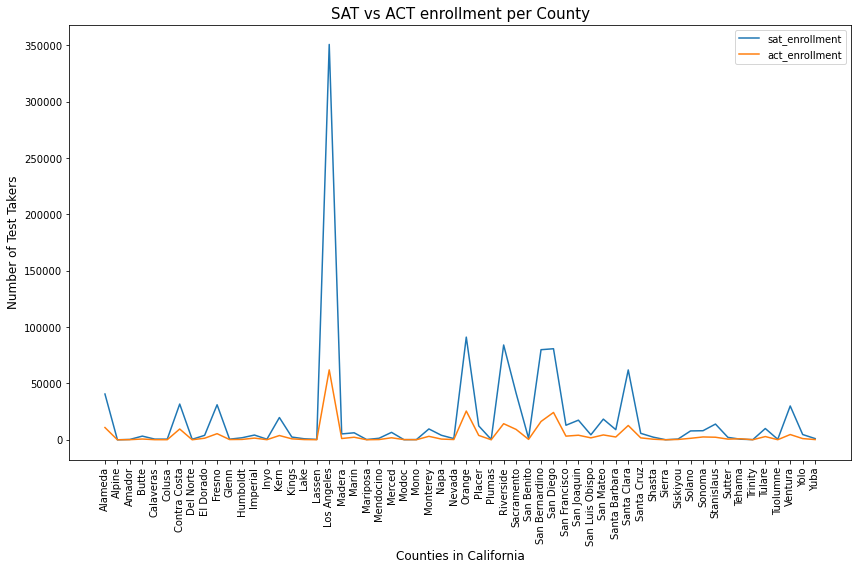

In [27]:
college_tests_county.plot(figsize=(14,8))
plt.title('SAT vs ACT enrollment per County', size=15)
plt.xlabel('Counties in California', size=12)
plt.ylabel('Number of Test Takers', size=12)
plt.xticks(ticks=ticks, labels=labels, rotation=90);